# AIMedic - Homework 4

Name: `Mahsa Amani`

Email: `mahsa.ama1391@gmail.com`

---
Mobina Pournemat and I thought about the exercise to learn more, and did it together.

## References

[github.com/qubvel/segmentation_models](https://github.com/qubvel/segmentation_models)

[segmentation-models.readthedocs.io](https://segmentation-models.readthedocs.io/en/latest/tutorial.html#training-with-non-rgb-data)

## Import requirements for load and preprocessing

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import adjust_brightness
from skimage.transform import rotate
import cv2
import scipy.io as sio

In [6]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Load data

In [ ]:
!wget https://warwick.ac.uk/fac/cross_fac/tia/data/hovernet/consep.zip

In [ ]:
!unzip consep.zip -d imgData

In [ ]:
!ls imgData/CoNSeP/Train/Images| wc -l

27


In [ ]:
!ls imgData/CoNSeP/Train/Labels| wc -l

27


In [ ]:
!ls imgData/CoNSeP/Train/Overlay| wc -l

27


In [3]:
training_size = 27

Above commands show that our **training set** have **27 pictures**!

In [ ]:
!ls imgData/CoNSeP/Test/Images| wc -l

14


In [ ]:
!ls imgData/CoNSeP/Test/Labels| wc -l

14


In [ ]:
!ls imgData/CoNSeP/Test/Overlay| wc -l

14


In [4]:
test_size = 14

Above commands show that our **test set** have **14 pictures**!

## Data Description

**Nuclear segmentation and classification**

This data includes 27 training data and 14 test data. These are the images of the tissues in body that their labels define which part of the image there is a nuclei and what type of it. So labels are matrix that each elements is from 0 to 7(classes). Moreover, for each image and label there is an overlay image which overlays the label on the image and shows parts of the tissue where the nuclei is.

## Preprocessing

### Shape of images

#### Train

In [ ]:
train_img = cv2.imread('imgData/CoNSeP/Train/Images/train_1.png')
print(f'Shape of training images is {train_img.shape}')

train_label = sio.loadmat('imgData/CoNSeP/Train/Labels/train_1.mat')
print('Shape of training labels is', train_label['type_map'].shape)

train_overlay = cv2.imread('imgData/CoNSeP/Train/Overlay/train_1.png')
print(f'Shape of training images overlay is {train_overlay.shape}') 

Shape of training images is (1000, 1000, 3)
Shape of training labels is (1000, 1000)
Shape of training images overlay is (1000, 1000, 3)


#### Test

In [ ]:
test_img = cv2.imread('imgData/CoNSeP/Test/Images/test_1.png')
print(f'Shape of test data is {test_img.shape}') 

test_label = sio.loadmat('imgData/CoNSeP/Test/Labels/test_1.mat')
print('Shape of test labels is', test_label['type_map'].shape)

test_overlay = cv2.imread('imgData/CoNSeP/Test/Overlay/test_1.png')
print(f'Shape of test images overlay is {test_overlay.shape}') 

Shape of test data is (1000, 1000, 3)
Shape of test labels is (1000, 1000)
Shape of test images overlay is (1000, 1000, 3)


### Image to Array

In [7]:
S = 640

#### Train

##### Images

In [8]:
training_imgs = []
training_imgs_shape = []
for i in range(1, training_size+1):
    address = f'imgData/CoNSeP/Train/Images/train_{str(i)}.png'
    img = cv2.imread(address)
    training_imgs.append(img)
    training_imgs_shape.append(img.shape)

In [9]:
X_train = np.array(training_imgs)
X_train.shape

(27, 1000, 1000, 3)

In [10]:
# check all labels size to be the same
shape_counter = {}
for shape in training_imgs_shape:
    shape_counter[shape] = shape_counter.get(shape, 0) + 1

print(shape_counter)

{(1000, 1000, 3): 27}


In [11]:
X_train = np.array([cv2.resize(img, (S, S)) for img in X_train])

In [12]:
X_train.shape

(27, 640, 640, 3)

In [13]:
# X_train_n = X_train / 255.
# Result didn't get better with this

##### Labels

In [14]:
training_labels = []
training_labels_shape = []
for i in range(1, training_size+1):
    address = f'imgData/CoNSeP/Train/Labels/train_{str(i)}.mat'
    label = sio.loadmat(address)['type_map']
    training_labels.append(label)
    training_labels_shape.append(label.shape)

In [15]:
y_train = np.array(training_labels)
y_train.shape

(27, 1000, 1000)

In [16]:
# check all labels size to be the same
shape_counter = {}
for shape in training_labels_shape:
    shape_counter[shape] = shape_counter.get(shape, 0) + 1

print(shape_counter)

{(1000, 1000): 27}


In [17]:
Y_train = to_categorical(y_train)

In [18]:
Y_train.shape

(27, 1000, 1000, 8)

In [19]:
Y_train = np.array([cv2.resize(img, (S, S)) for img in Y_train])

In [20]:
Y_train.shape

(27, 640, 640, 8)

##### Overlays

In [21]:
training_overlays = []
training_overlays_shape = []
for i in range(1, training_size+1):
    address = f'imgData/CoNSeP/Train/Overlay/train_{str(i)}.png'
    img = cv2.imread(address)
    training_overlays.append(img)
    training_overlays_shape.append(img.shape)

In [22]:
XY_train = np.array(training_overlays)
XY_train.shape

(27, 1000, 1000, 3)

In [23]:
# check all labels size to be the same
shape_counter = {}
for shape in training_overlays_shape:
    shape_counter[shape] = shape_counter.get(shape, 0) + 1

print(shape_counter)

{(1000, 1000, 3): 27}


In [24]:
XY_train = np.array([cv2.resize(img, (S, S)) for img in XY_train])

#### Test

##### Images

In [25]:
test_imgs = []
test_imgs_shape = []
for i in range(1, test_size+1):
    address = f'imgData/CoNSeP/Test/Images/test_{str(i)}.png'
    img = cv2.imread(address)
    test_imgs.append(img)
    test_imgs_shape.append(img.shape)

In [26]:
X_test = np.array(test_imgs)
X_test.shape

(14, 1000, 1000, 3)

In [27]:
# check all labels size to be the same
shape_counter = {}
for shape in test_imgs_shape:
    shape_counter[shape] = shape_counter.get(shape, 0) + 1

print(shape_counter)

{(1000, 1000, 3): 14}


In [28]:
X_test = np.array([cv2.resize(img, (S, S)) for img in X_test])

In [29]:
# X_test_n = X_test / 255.

##### Labels

In [30]:
test_labels = []
test_labels_shape = []
for i in range(1, test_size+1):
    address = f'imgData/CoNSeP/Test/Labels/test_{str(i)}.mat'
    label = sio.loadmat(address)['type_map']
    test_labels.append(label)
    test_labels_shape.append(label.shape)

In [31]:
y_test = np.array(test_labels)
y_test.shape

(14, 1000, 1000)

In [32]:
# check all labels size to be the same
shape_counter = {}
for shape in test_labels_shape:
    shape_counter[shape] = shape_counter.get(shape, 0) + 1

print(shape_counter)

{(1000, 1000): 14}


In [33]:
Y_test = to_categorical(y_test)

In [34]:
Y_test = np.array([cv2.resize(img, (S, S)) for img in Y_test])

In [35]:
Y_test.shape

(14, 640, 640, 8)

##### Overlays

In [36]:
test_overlays = []
test_overlays_shape = []
for i in range(1, test_size+1):
    address = f'imgData/CoNSeP/Test/Overlay/test_{str(i)}.png'
    img = cv2.imread(address)
    test_overlays.append(img)
    test_overlays_shape.append(img.shape)

In [37]:
XY_test = np.array(test_overlays)
XY_test.shape

(14, 1000, 1000, 3)

In [38]:
# check all labels size to be the same
shape_counter = {}
for shape in test_overlays_shape:
    shape_counter[shape] = shape_counter.get(shape, 0) + 1

print(shape_counter)

{(1000, 1000, 3): 14}


In [39]:
XY_test = np.array([cv2.resize(img, (S, S)) for img in XY_test])

### Visualize data

#### Train

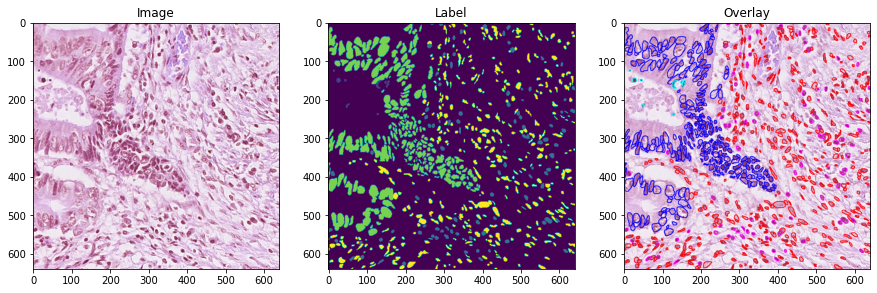

In [ ]:
i = 0
plt.figure(figsize=(15, 45))

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(X_train[i])

plt.subplot(1, 3, 2)
plt.title("Label")
plt.imshow(np.argmax(Y_train[i], axis=2))

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(XY_train[i])

#### Test

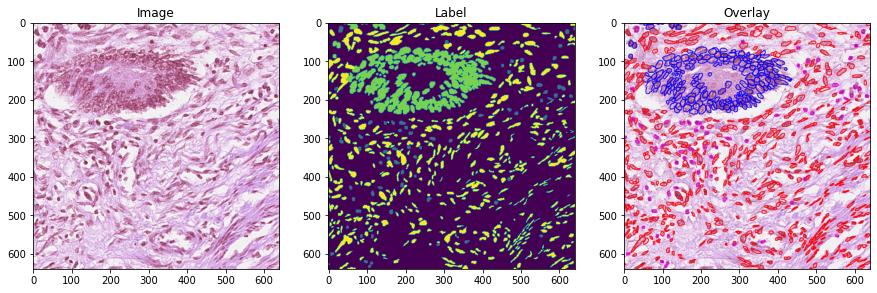

In [ ]:
i = 0
plt.figure(figsize=(15, 45))

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(X_test[i])

plt.subplot(1, 3, 2)
plt.title("Label")
plt.imshow(np.argmax(Y_test[i], axis=2))

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(XY_test[i])

### Augmentation methods



*   **Geometric transformations** – you can randomly flip, crop, rotate, shift, brightness, zoom
*   **Color space transformations** – change RGB color channels, intensify any color
*   **Kernel filters** – sharpen or blur an image 
Random Erasing – delete a part of the initial image
*   **Mixing images** – basically, mix images with one another. Might be counterintuitive but it works



In [40]:
X_train_ = X_train
Y_train_ = Y_train

for i in range(training_size):
    X_train_ = np.append(X_train_, [adjust_brightness(X_train[i], delta=0.3), adjust_brightness(X_train[i], delta=-0.3)], axis=0)
    X_train_ = np.append(X_train_, [rotate(X_train[i], 90), rotate(X_train[i], 180)], axis=0)
    Y_train_ = np.append(Y_train_, [Y_train[i], Y_train[i], rotate(Y_train[i], 90), rotate(Y_train[i], 180)], axis=0)

From above methods, because of type of data, changing brightness and rotating have the most effect on the IOU score and others.

### Train Test Split

In [39]:
# X_train__, X_val, Y_train__, Y_val = train_test_split(X_train_, Y_train_, test_size=0.2, random_state=42)
# Because of the size of data, this didn't work out well and crashed

## Import requirements for training

In [41]:
!pip install segmentation_models

In [42]:
!pip install -U albumentations>=0.3.0 --user 
!pip install -U --pre segmentation-models --user

In [43]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [44]:
sm.set_framework('tf.keras')

## Model Architecture

#### Load UNET Pre-trained Model

In [45]:
model = sm.Unet('efficientnetb3', classes=8, activation='softmax', input_shape=(None, None, 3))

In [46]:
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score, sm.metrics.FScore()],
)

#### Last layer Fine Tuning

In [ ]:
# fit model
model.fit(
    X_train_,
    Y_train_,
    batch_size=2,
    epochs=40
    # validation_data=(X_val, Y_val)
)

Epoch 1/40
68/68 [==============================] - 81s 1s/step - loss: 0.8786 - iou_score: 0.2185 - f1-score: 0.2705
Epoch 2/40
68/68 [==============================] - 81s 1s/step - loss: 0.8649 - iou_score: 0.2259 - f1-score: 0.2804
Epoch 3/40
68/68 [==============================] - 81s 1s/step - loss: 0.8537 - iou_score: 0.2347 - f1-score: 0.2911
Epoch 4/40
68/68 [==============================] - 82s 1s/step - loss: 0.8745 - iou_score: 0.2208 - f1-score: 0.2736
Epoch 5/40
68/68 [==============================] - 81s 1s/step - loss: 0.8498 - iou_score: 0.2375 - f1-score: 0.2933
Epoch 6/40
68/68 [==============================] - 81s 1s/step - loss: 0.8415 - iou_score: 0.2450 - f1-score: 0.3031
Epoch 7/40
68/68 [==============================] - 81s 1s/step - loss: 0.8368 - iou_score: 0.2498 - f1-score: 0.3093
Epoch 8/40
68/68 [==============================] - 81s 1s/step - loss: 0.8394 - iou_score: 0.2478 - f1-score: 0.3059
Epoch 9/40
68/68 [==============================] - 81s 

In [ ]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 2s 2s/step - loss: 0.7967 - iou_score: 0.3100 - f1-score: 0.4142


[0.7967255711555481, 0.31003475189208984, 0.4141557216644287]

In [ ]:
Y_pred = model.predict(X_test)

In [47]:
# Pixel Accuracy
def pixel_accuracy(Y_true, Y_pred):
    test_size = Y_true.shape[0]
    S = Y_true.shape[1]
    y_pred = np.argmax(Y_pred, axis=3)
    y_true = np.argmax(Y_true, axis=3)
    pixels = test_size * S * S
    right_pixel = 0
    for i in range(test_size):
        for j in range(S):
            for k in range(S):
                if y_pred[i][j][k]==y_true[i][j][k]:
                    right_pixel += 1

    return right_pixel/pixels   

In [ ]:
print(pixel_accuracy(Y_test, Y_pred))

0.8718593052455357


In [48]:
# Confusion Matrix
def confusion_matrix(Y_true, Y_pred):
    test_size = Y_true.shape[0]
    S = Y_true.shape[1]
    no_classes = Y_true.shape[-1]

    y_pred = np.argmax(Y_pred, axis=3)
    y_true = np.argmax(Y_true, axis=3) 
    conf_mat = [[0 for i in range(no_classes)] for j in range(no_classes)]

    for i in range(test_size):
        for j in range(S):
            for k in range(S):
                conf_mat[y_true[i][j][k]][y_pred[i][j][k]] += 1

    mat = pd.DataFrame(conf_mat)
    return mat

In [ ]:
print(confusion_matrix(Y_test, Y_pred))

         0     1      2      3       4       5      6  7
0  4312382   986   2598  37397  158819   95196   3887  0
1     7146  1296    217   3560    6814   10606     11  0
2     8478  1601  23145  10548   23077   54231   1489  0
3    11858     0     48  62431   13119    2626    316  0
4    64175    66    159  14464  442383    3898      1  0
5    48470   147    234  42217   34659  136099   3176  0
6    38749    96      1   8069     108   12809  21854  0
7     1533    31      0   2307     647    2965   1201  0


#### Whole model Fine Tuning

In [49]:
model.trainable = True

In [50]:
model.fit(
    X_train_,
    Y_train_,
    batch_size=2,
    epochs=40,
    # validation_data=(X_val, Y_val)
)

Epoch 1/40
68/68 [==============================] - 144s 1s/step - loss: 1.2199 - iou_score: 0.0913 - f1-score: 0.1183
Epoch 2/40
68/68 [==============================] - 82s 1s/step - loss: 0.9886 - iou_score: 0.1323 - f1-score: 0.1604
Epoch 3/40
68/68 [==============================] - 82s 1s/step - loss: 0.9722 - iou_score: 0.1449 - f1-score: 0.1764
Epoch 4/40
68/68 [==============================] - 81s 1s/step - loss: 0.9453 - iou_score: 0.1646 - f1-score: 0.2041
Epoch 5/40
68/68 [==============================] - 82s 1s/step - loss: 0.9343 - iou_score: 0.1764 - f1-score: 0.2191
Epoch 6/40
68/68 [==============================] - 82s 1s/step - loss: 0.9198 - iou_score: 0.1845 - f1-score: 0.2300
Epoch 7/40
68/68 [==============================] - 82s 1s/step - loss: 0.9287 - iou_score: 0.1795 - f1-score: 0.2231
Epoch 8/40
68/68 [==============================] - 81s 1s/step - loss: 0.8980 - iou_score: 0.2018 - f1-score: 0.2506
Epoch 9/40
68/68 [==============================] - 81s

In [51]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 15s 15s/step - loss: 0.7542 - iou_score: 0.3342 - f1-score: 0.4357


[0.7541838884353638, 0.3341924548149109, 0.4357187747955322]

In [52]:
Y_pred = model.predict(X_test)

In [53]:
print(pixel_accuracy(Y_test, Y_pred))

0.8847115652901786


In [54]:
print(confusion_matrix(Y_test, Y_pred))

         0     1      2     3       4       5      6  7
0  4407146  1625  15432   499  116504   61414   8645  0
1    10089  2699   4083   227    6407    5421    724  0
2    10881  1400  79790   310    3621   24745   1822  0
3    15421     0   1151  1150   59851    9821   3004  0
4   102227   612    534   168  414145    1904   5556  0
5    78371   276  11423   918   23697  135403  14914  0
6    40959   206     72     8    1495    5989  32957  0
7     2018    32    131     0      18    1997   4488  0


Because of data, the IOU is low.